### Tensorflow Convolution Neural Networks

 Architecture of a CNN
  - input layer       -> batch size, image_height, image_width, color_channels
  - convolution layer -> tf.keras.layers.conv2d
  - hidden activation  -> "relu" non linear activations
  - pooling layers AvgPool2D or MaxPool2D : Reduce the dimensionality of the image features
  - refine learned features Dense
  - sigmoid or softmax ( binary or multiclass)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import sys

In [7]:
DATASET_SOURCE = "/home/arun/learn/tensorflow_certification/datasets/food_101/binary"
CATEGORY = ["train","test"]
CLASSES = os.listdir(os.path.join(DATASET_SOURCE, CATEGORY[0]))
CLASSES

['pizza', 'omelette']

In [8]:
def view_random_image(class_name, category=CATEGORY[0]):
    """
     View an random image from the specified class
    """
    print(f"[view_random_image] Viewing from the Category: {category} class: {class_name}")
    base_path = os.path.join(DATASET_SOURCE, category, class_name)
    random_image = random.sample(os.listdir(base_path), 1)[-1]
    print(f"[view_random_image] the image selected is : {random_image}")
    img = mpimg.imread(os.path.join(base_path,random_image))
    print(f"[view_random_image] Shape of the image is : {img.shape}")
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")
    return img
    

[view_random_image] Viewing from the Category: train class: pizza
[view_random_image] the image selected is : 2361973.jpg
[view_random_image] Shape of the image is : (384, 512, 3)


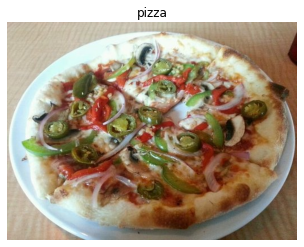

In [9]:
_ = view_random_image("pizza")

[view_random_image] Viewing from the Category: train class: pizza
[view_random_image] the image selected is : 2293453.jpg
[view_random_image] Shape of the image is : (512, 512, 3)


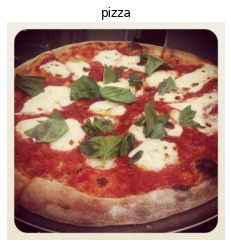

In [10]:
_ =view_random_image("pizza")

 - Step 1 : Preprocessing the input Data
          : Encoding the data, Normalizing the data, onhot encoding
 - Step 2 : Building the model
 - Step 3 : Training the model
 - Step 4 : Evaluating the model

In [11]:
# Data Preprocessing
# Normalization
tf.random.set_seed(42)

# A method to preprocess the image to apply the scaling
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = os.path.join(DATASET_SOURCE, CATEGORY[0])
test_dir = os.path.join(DATASET_SOURCE, CATEGORY[1])

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


2022-01-20 10:24:01.073091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-20 10:24:01.124791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-20 10:24:01.125757: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-20 10:24:01.128086: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "food_pizza_steak_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer1 (Conv2D)        (None, 222, 222, 10)      280       
                                                                 
 conv_layer2 (Conv2D)        (None, 220, 220, 10)      910       
                                                                 
 pool_layer1 (MaxPooling2D)  (None, 110, 110, 10)      0         
                                                                 
 conv_layer3 (Conv2D)        (None, 108, 108, 10)      910       
                                                                 
 conv_layer4 (Conv2D)        (None, 106, 106, 10)      910       
                                                                 
 pool_layer2 (MaxPooling2D)  (None, 53, 53, 10)        0         
                                                                 
 flatten_layer (Flatten)     (None, 280

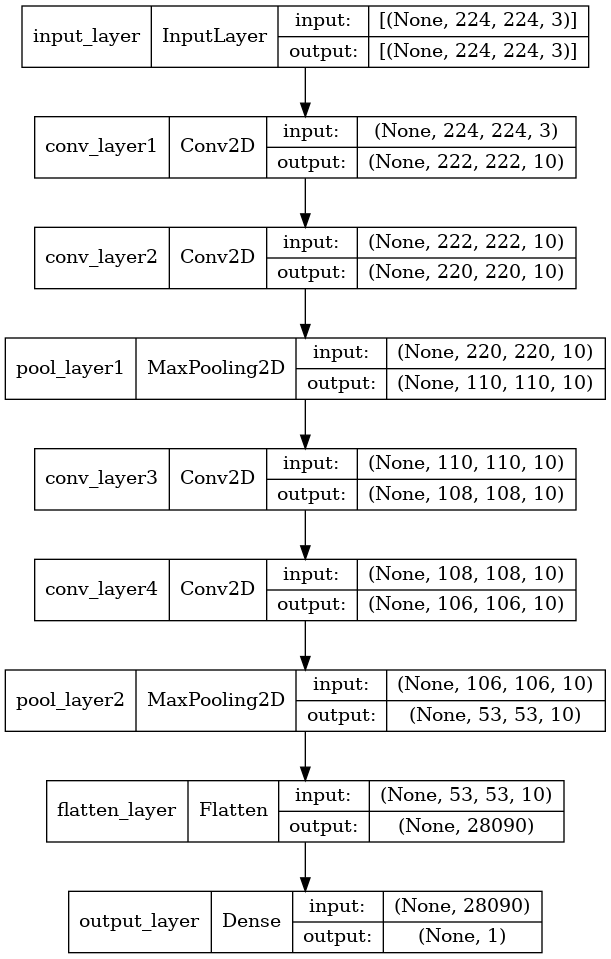

In [12]:
# Build model
tf.random.set_seed(42)
base_model = tf.keras.Sequential(layers=[
    # The input layer
    tf.keras.layers.InputLayer(input_shape=(224,224,3), name="input_layer"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",
                          input_shape=(224, 224, 3), name="conv_layer1"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation="relu", name="conv_layer2"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid", name="pool_layer1"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", name="conv_layer3"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", name="conv_layer4"),
    tf.keras.layers.MaxPool2D(pool_size=2, name="pool_layer2"),
    # Flatten the Pooled results
    tf.keras.layers.Flatten(name="flatten_layer"),
    # Output layer
    tf.keras.layers.Dense(units=1,
                          activation="sigmoid",
                          name="output_layer"),    
], name="food_pizza_steak_classifier")
base_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])
base_model.summary()
tf.keras.utils.plot_model(model=base_model, show_shapes=True)

In [13]:
base_history=base_model.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=valid_data,
                            validation_steps=len(valid_data)
                           )
# 47

Epoch 1/5


2022-01-20 10:24:10.805833: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8202


47/47 [==============================] - 15s 183ms/step - loss: 0.5929 - accuracy: 0.6793 - val_loss: 0.4982 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 7s 155ms/step - loss: 0.5001 - accuracy: 0.7573 - val_loss: 0.4648 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4489 - accuracy: 0.7967 - val_loss: 0.4617 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4370 - accuracy: 0.8013 - val_loss: 0.3959 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3772 - accuracy: 0.8340 - val_loss: 0.3805 - val_accuracy: 0.8480


Text(0.5, 0, 'epochs')

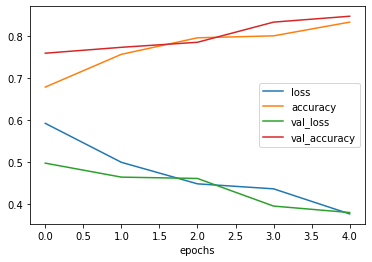

In [14]:
pd.DataFrame(base_history.history).plot()
plt.xlabel("epochs")

In [15]:
47*32

1504

Model: "base_neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_layer (Flatten)     (None, 150528)            0         
                                                                 
 hidden_layer_1 (Dense)      (None, 120)               18063480  
                                                                 
 hidden_layer_2 (Dense)      (None, 120)               14520     
                                                                 
 output_layer (Dense)        (None, 1)                 121       
                                                                 
Total params: 18,078,121
Trainable params: 18,078,121
Non-trainable params: 0
_________________________________________________________________


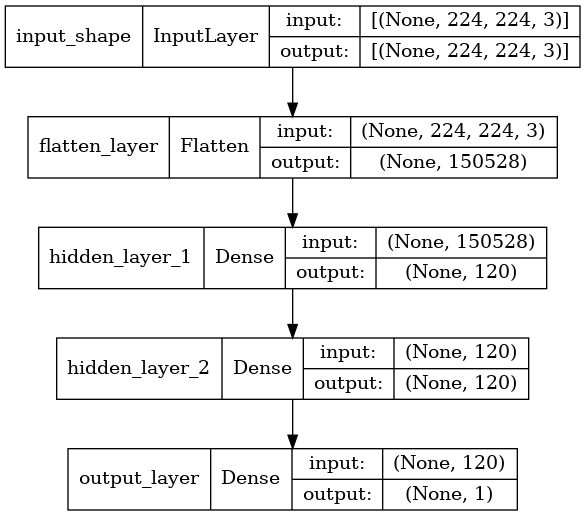

In [16]:
# building the ANN, with 2 layers, 10 neurons each
tf.random.set_seed(42)
base_model_ann = tf.keras.Sequential(layers=[
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3), name="input_shape"),
    tf.keras.layers.Flatten(input_shape=(224, 224, 3), name="flatten_layer"),
    tf.keras.layers.Dense(units=120, activation="relu", name="hidden_layer_1"),
    tf.keras.layers.Dense(units=120, activation="relu", name="hidden_layer_2"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer"),    
], name="base_neural_network")

base_model_ann.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])
base_model_ann.summary()
tf.keras.utils.plot_model(model=base_model_ann, show_shapes=True)

In [17]:
history_ann = base_model_ann.fit(train_data,
                                 epochs=5,
                                 validation_data=valid_data,
                                 steps_per_epoch=len(train_data),
                                 validation_steps=len(valid_data)
                            )

Epoch 1/5
47/47 [==============================] - 7s 144ms/step - loss: 4.8827 - accuracy: 0.5987 - val_loss: 1.1182 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 1.1075 - accuracy: 0.6987 - val_loss: 0.7947 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 7s 151ms/step - loss: 0.8599 - accuracy: 0.7120 - val_loss: 0.7552 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 8s 162ms/step - loss: 0.9402 - accuracy: 0.7213 - val_loss: 0.5154 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 7s 147ms/step - loss: 0.5777 - accuracy: 0.7700 - val_loss: 0.6267 - val_accuracy: 0.7340


In [18]:
DATASET_SOURCE = "/home/arun/learn/tensorflow_certification/datasets/food_101/custom_mini"
CATEGORY = ["train","test"]
CLASSES = os.listdir(os.path.join(DATASET_SOURCE, CATEGORY[0]))
CLASSES

FileNotFoundError: [Errno 2] No such file or directory: '/home/arun/learn/tensorflow_certification/datasets/food_101/custom_mini/train'

Found 3000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Model: "multi_class_food_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer1 (Conv2D)        (None, 222, 222, 10)      280       
                                                                 
 conv_layer2 (Conv2D)        (None, 220, 220, 10)      910       
                                                                 
 pooling_layer1 (MaxPooling2  (None, 110, 110, 10)     0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 121000)            0         
                                                                 
 output_layer (Dense)        (None, 4)                 484004    
                                                                 
Total params: 485,194

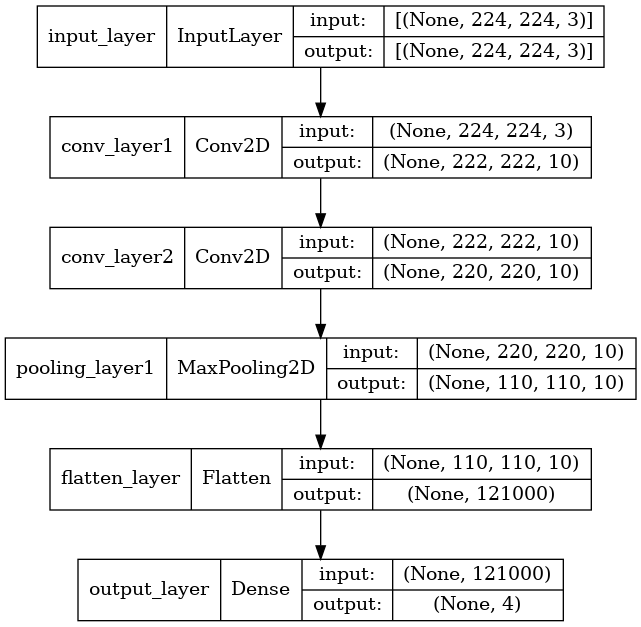

[0. 0. 0. 1.]


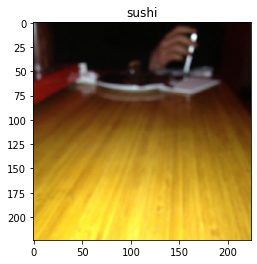

In [22]:
#Viewing the tensor images

sample_num = 31
classes = ["omelette","pizza","steak","sushi"]
plt.imshow(images[sample_num])
plt.title(classes[tf.argmax(labels[sample_num])])
print(labels[sample_num])

In [19]:
# Building a multiclass classifier
# Preprocess the data
DATASET_SOURCE = "/home/arun/learn/tensorflow_certification/datasets/food_101/mini"


train_dir = os.path.join(DATASET_SOURCE, CATEGORY[0])
test_dir = os.path.join(DATASET_SOURCE, CATEGORY[1])

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               classes=["omelette","pizza","steak","sushi"],
                                               class_mode="categorical",
                                              )
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             classes=["omelette","pizza","steak","sushi"],
                                             target_size=(224,224),
                                             class_mode="categorical",)


# Build the model
tf.random.set_seed(42)

food_multi_class_model = tf.keras.Sequential(layers=[
    # Input Layer
    tf.keras.layers.InputLayer(input_shape=(224,224,3), name="input_layer"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3),
                           padding="valid", activation="relu", name="conv_layer1"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           padding="valid", activation="relu", name="conv_layer2"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="pooling_layer1"),
    tf.keras.layers.Flatten(name="flatten_layer"),
    tf.keras.layers.Dense(units=14, activation="sigmoid", name="output_layer")
], name="multi_class_food_classifier")
food_multi_class_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["accuracy"])
food_multi_class_model.summary()
tf.keras.utils.plot_model(model=food_multi_class_model, show_shapes=True)
images, labels = train_data.next()
print(len(images[0]), images[0].shape)

Found 3000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Model: "multi_class_food_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer1 (Conv2D)        (None, 222, 222, 10)      280       
                                                                 
 conv_layer2 (Conv2D)        (None, 220, 220, 10)      910       
                                                                 
 pooling_layer1 (MaxPooling2  (None, 110, 110, 10)     0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 121000)            0         
                                                                 
 output_layer (Dense)        (None, 4)                 484004    
                                                                 
Total params: 485,194

In [21]:
history_multi_class = food_multi_class_model.fit(train_data,
                                                 validation_data=valid_data,
                                                 epochs=5,
                                                 steps_per_epoch=len(train_data),
                                                 validation_steps=len(valid_data),
                                                )

Epoch 1/5
94/94 [==============================] - ETA: 0s - loss: 1.4920 - accuracy: 0.4253

ValueError: in user code:

    File "/home/arun/learn/tensorflow_certification/venv/lib/python3.8/site-packages/keras/engine/training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "/home/arun/learn/tensorflow_certification/venv/lib/python3.8/site-packages/keras/engine/training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/arun/learn/tensorflow_certification/venv/lib/python3.8/site-packages/keras/engine/training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "/home/arun/learn/tensorflow_certification/venv/lib/python3.8/site-packages/keras/engine/training.py", line 1305, in test_step
        self.compiled_loss(
    File "/home/arun/learn/tensorflow_certification/venv/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/arun/learn/tensorflow_certification/venv/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/arun/learn/tensorflow_certification/venv/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/arun/learn/tensorflow_certification/venv/lib/python3.8/site-packages/keras/losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/arun/learn/tensorflow_certification/venv/lib/python3.8/site-packages/keras/backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Model: "food_classifier_augmented_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 222, 222, 32)      896       
                                                                 
 pooling_layer_1 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv_layer_2 (Conv2D)       (None, 109, 109, 16)      4624      
                                                                 
 pooling_layer_2 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv_layer_3 (Conv2D)       (None, 52, 52, 10)        1450      
                  

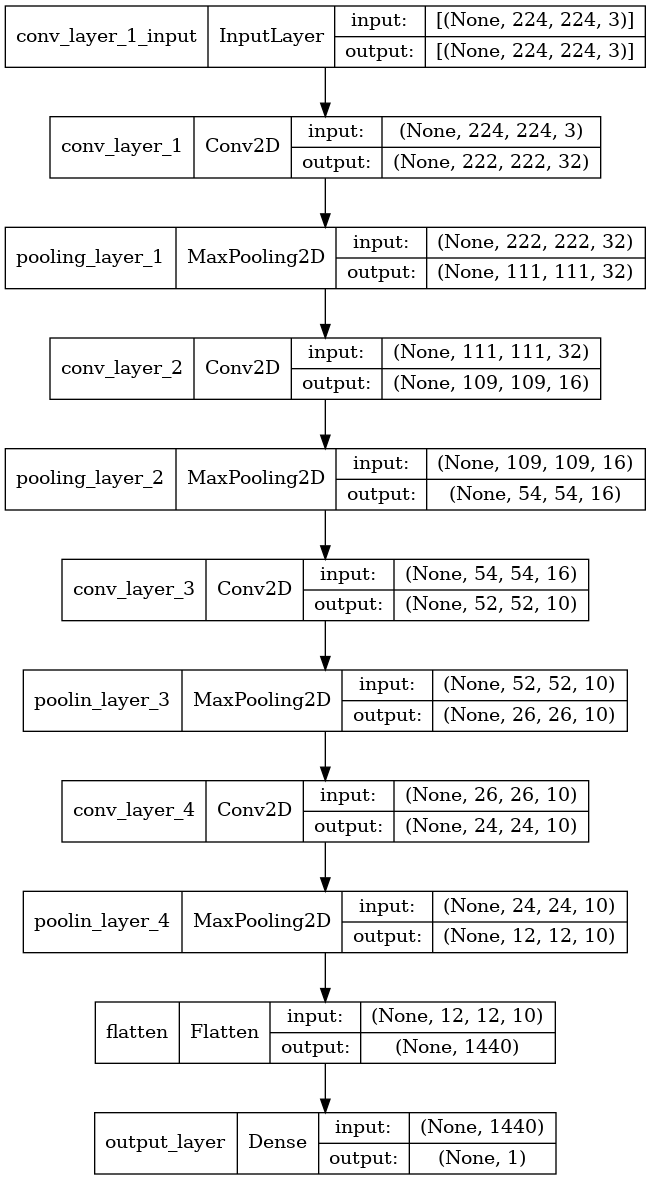

In [23]:
# augmenting data
DATASET_SOURCE = "/home/arun/learn/tensorflow_certification/datasets/food_101/binary"
CATEGORY = ["train","test"]
CLASSES = os.listdir(os.path.join(DATASET_SOURCE, CATEGORY[0]))

train_data_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          height_shift_range=0.3,
                                          width_shift_range=0.3,
                                          horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = os.path.join(DATASET_SOURCE, CATEGORY[0])
test_dir = os.path.join(DATASET_SOURCE, CATEGORY[1])

train_data_augmented = train_data_augmented.flow_from_directory(directory=train_dir,
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                target_size=(224,224),
                                                               )
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             class_mode="binary",
                                             target_size=(224,224),
                                            )


# Build the model
tf.random.set_seed(42)

base_food_classifier = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(224,224,3),
                           padding="valid",activation="relu", name="conv_layer_1"),
    tf.keras.layers.MaxPool2D(pool_size=2, name="pooling_layer_1"),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", name="conv_layer_2"),
    tf.keras.layers.MaxPool2D(pool_size=2, name="pooling_layer_2"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", name="conv_layer_3"),
    tf.keras.layers.MaxPool2D(pool_size=2, name="poolin_layer_3"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", name="conv_layer_4"),
    tf.keras.layers.MaxPool2D(pool_size=2, name="poolin_layer_4"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")
], name="food_classifier_augmented_model")
base_food_classifier.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                             optimizer=tf.keras.optimizers.Adam(),
                             metrics=["accuracy"])
base_food_classifier.summary()
tf.keras.utils.plot_model(model=base_food_classifier, show_shapes=True)

In [24]:
history_augmented = base_food_classifier.fit(train_data_augmented, epochs=10,
                                             steps_per_epoch=len(train_data_augmented),
                                             validation_data=valid_data,
                                             validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 488ms/step - loss: 0.6953 - accuracy: 0.5067 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 23s 497ms/step - loss: 0.6528 - accuracy: 0.5813 - val_loss: 0.5533 - val_accuracy: 0.7160
Epoch 3/10
47/47 [==============================] - 23s 485ms/step - loss: 0.5552 - accuracy: 0.7160 - val_loss: 0.5756 - val_accuracy: 0.7000
Epoch 4/10
47/47 [==============================] - 23s 485ms/step - loss: 0.5392 - accuracy: 0.7253 - val_loss: 0.4870 - val_accuracy: 0.7820
Epoch 5/10
47/47 [==============================] - 25s 542ms/step - loss: 0.5274 - accuracy: 0.7353 - val_loss: 0.5084 - val_accuracy: 0.7500
Epoch 6/10
47/47 [==============================] - 24s 514ms/step - loss: 0.5319 - accuracy: 0.7467 - val_loss: 0.4560 - val_accuracy: 0.8020
Epoch 7/10
47/47 [==============================] - 27s 582ms/step - loss: 0.4958 - accuracy: 0.7673 - val_loss: 0.4639 - val_accuracy: 0.7920

Text(0.5, 0, 'epochs')

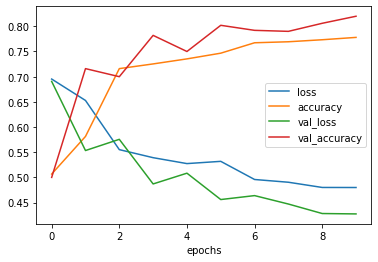

In [25]:
pd.DataFrame(history_augmented.history).plot()
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

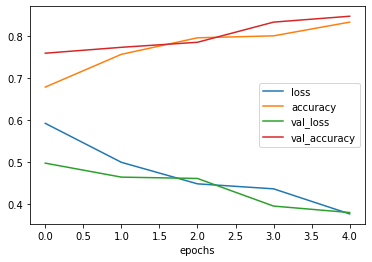

In [26]:
pd.DataFrame(base_history.history).plot()
plt.xlabel("epochs")

In [27]:
def preprocess_image(image_file,  image_shape=(224,224)):
    raw_img = tf.io.read_file(image_file)
    decoded_image = tf.image.decode_image(raw_img)
    img =tf.image.resize(decoded_image, size=[224, 224])
    return img/255.

In [28]:
test_custom_images = []
base_custom_test_path = "/home/arun/learn/tensorflow_certification/datasets/food_101/custom/tests"
for img in os.listdir(base_custom_test_path):
    print(img)
    test_custom_images.append(preprocess_image(os.path.join(base_custom_test_path, img)))

omlette_01.jpeg
omlette_02.jpeg
pizza_01.jpeg
pizza_02.jpeg


In [29]:
test_custom_images[0].shape

TensorShape([224, 224, 3])

In [30]:
for test_img in test_custom_images:
    res = base_food_classifier.predict(tf.expand_dims(test_img, axis=0))
    print(res)

[[0.3116882]]
[[0.26378006]]
[[0.82095814]]
[[0.69756734]]


In [37]:
# Multi calss Cnn classification
tf.random.set_seed(42)

MULTICLASS_DATASET_SOURCE = "/home/arun/learn/tensorflow_certification/datasets/food_101/mini"

train_dir = os.path.join(MULTICLASS_DATASET_SOURCE, CATEGORY[0])
test_dir = os.path.join(MULTICLASS_DATASET_SOURCE, CATEGORY[1])

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   )
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical", 
                                               )
valid_data = test_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="categorical",
                                             )
print("Training data : ", len(train_data))
print("Validation data : ", len(valid_data))


Found 12000 images belonging to 16 classes.
Found 4000 images belonging to 16 classes.
Training data :  375
Validation data :  125


In [36]:
sample_iamges, labels = train_data.next()
labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

Model: "FoodClassifierMultiClass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1_1 (Conv2D)     (None, 222, 222, 32)      896       
                                                                 
 conv_layer_1_2 (Conv2D)     (None, 220, 220, 32)      9248      
                                                                 
 pooling_layer_1 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv_layer_2_1 (Conv2D)     (None, 108, 108, 64)      18496     
                                                                 
 conv_layer_2_2 (Conv2D)     (None, 106, 106, 64)      36928     
                                                                 
 pooling_layer_2 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                      

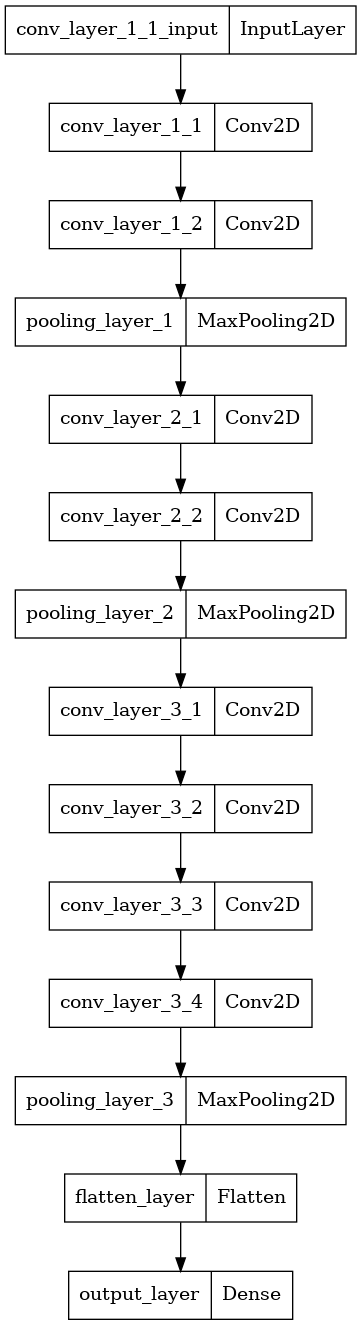

In [41]:
food_multiclass_model = tf.keras.Sequential(layers=[
    # First
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(224,224,3),
                           activation="relu", name="conv_layer_1_1"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                           activation="relu", name="conv_layer_1_2"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid", name="pooling_layer_1"),
    # Second
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,
                           activation="relu", name="conv_layer_2_1"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,
                           activation="relu", name="conv_layer_2_2"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid", name="pooling_layer_2"),
    # Third
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,
                           activation="relu", name="conv_layer_3_1"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,
                           activation="relu", name="conv_layer_3_2"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,
                           activation="relu", name="conv_layer_3_3"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,
                           activation="relu", name="conv_layer_3_4"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid", name="pooling_layer_3"),
    tf.keras.layers.Flatten(name="flatten_layer"),
    tf.keras.layers.Dense(units=16, activation="softmax", name="output_layer"),    
], name="FoodClassifierMultiClass")

food_multiclass_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=["accuracy"])
food_multiclass_model.summary()
tf.keras.utils.plot_model(food_multiclass_model)

In [42]:
history_multiclass = food_multiclass_model.fit(train_data,
                                               epochs=5,
                                               steps_per_epoch=len(train_data),
                                               validation_data=valid_data,
                                               validation_steps=len(valid_data),)

Epoch 1/5


2022-01-20 11:19:53.871132: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.68GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-20 11:19:53.871274: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.68GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-20 11:19:58.787355: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-20 11:19:58.787439: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Alloc

  2/375 [..............................] - ETA: 1:47 - loss: 2.7978 - accuracy: 0.0781 

2022-01-20 11:20:00.071423: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 850.92MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


  3/375 [..............................] - ETA: 2:29 - loss: 2.7866 - accuracy: 0.0729

2022-01-20 11:20:00.448044: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 850.92MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


375/375 [==============================] - 153s 390ms/step - loss: 2.7729 - accuracy: 0.0598 - val_loss: 2.7726 - val_accuracy: 0.0625
Epoch 2/5
375/375 [==============================] - 149s 396ms/step - loss: 2.7729 - accuracy: 0.0592 - val_loss: 2.7726 - val_accuracy: 0.0625
Epoch 3/5
375/375 [==============================] - 152s 404ms/step - loss: 2.7729 - accuracy: 0.0581 - val_loss: 2.7726 - val_accuracy: 0.0625
Epoch 4/5
375/375 [==============================] - 155s 412ms/step - loss: 2.7729 - accuracy: 0.0579 - val_loss: 2.7726 - val_accuracy: 0.0625
Epoch 5/5
375/375 [==============================] - 155s 412ms/step - loss: 2.7729 - accuracy: 0.0584 - val_loss: 2.7726 - val_accuracy: 0.0625


Text(0.5, 0, 'Epochs')

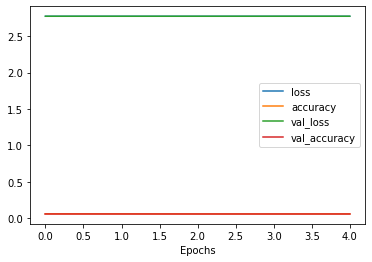

In [45]:
pd.DataFrame(history_multiclass.history).plot()
plt.xlabel("Epochs")
# plt.ylabel("")

Model: "FoodClassifierMultiClass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1_1 (Conv2D)     (None, 222, 222, 10)      280       
                                                                 
 conv_layer_1_2 (Conv2D)     (None, 220, 220, 10)      910       
                                                                 
 pooling_layer_1 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv_layer_2_1 (Conv2D)     (None, 108, 108, 16)      1456      
                                                                 
 conv_layer_2_2 (Conv2D)     (None, 106, 106, 16)      2320      
                                                                 
 pooling_layer_2 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                      

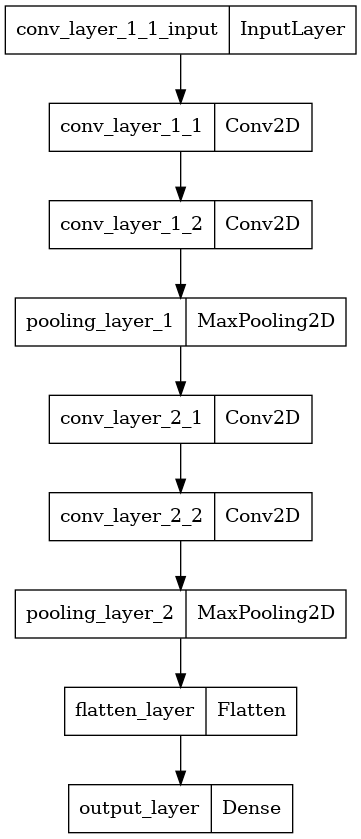

In [43]:
food_mc_mini_01 = tf.keras.Sequential(layers=[
    # First
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, input_shape=(224,224,3),
                           activation="relu", name="conv_layer_1_1"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation="relu", name="conv_layer_1_2"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid", name="pooling_layer_1"),
    # Second
    tf.keras.layers.Conv2D(filters=16, kernel_size=3,
                           activation="relu", name="conv_layer_2_1"),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3,
                           activation="relu", name="conv_layer_2_2"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid", name="pooling_layer_2"),
#     # Third
#     tf.keras.layers.Conv2D(filters=10, kernel_size=3,
#                            activation="relu", name="conv_layer_3_1"),
#     tf.keras.layers.Conv2D(filters=10, kernel_size=3,
#                            activation="relu", name="conv_layer_3_2"),
#     tf.keras.layers.Conv2D(filters=10, kernel_size=3,
#                            activation="relu", name="conv_layer_3_3"),
#     tf.keras.layers.Conv2D(filters=10, kernel_size=3,
#                            activation="relu", name="conv_layer_3_4"),
#     tf.keras.layers.MaxPool2D(pool_size=2, padding="valid", name="pooling_layer_3"),
    tf.keras.layers.Flatten(name="flatten_layer"),
    tf.keras.layers.Dense(units=16, activation="softmax", name="output_layer"),    
], name="FoodClassifierMultiClass")

food_mc_mini_01.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=["accuracy"])
food_mc_mini_01.summary()
tf.keras.utils.plot_model(food_mc_mini_01)

In [44]:
history_mc_01 = food_mc_mini_01.fit(train_data,
                                    epochs=5,
                                    steps_per_epoch=len(train_data),
                                    validation_data=valid_data,
                                    validation_steps=len(valid_data),)

Epoch 1/5
375/375 [==============================] - 124s 328ms/step - loss: 2.6574 - accuracy: 0.1436 - val_loss: 2.4729 - val_accuracy: 0.2100
Epoch 2/5
375/375 [==============================] - 122s 324ms/step - loss: 2.2121 - accuracy: 0.3083 - val_loss: 2.4362 - val_accuracy: 0.2425
Epoch 3/5
375/375 [==============================] - 130s 346ms/step - loss: 1.4088 - accuracy: 0.5619 - val_loss: 3.0589 - val_accuracy: 0.2097
Epoch 4/5
375/375 [==============================] - 127s 339ms/step - loss: 0.5545 - accuracy: 0.8315 - val_loss: 4.6173 - val_accuracy: 0.1780
Epoch 5/5
375/375 [==============================] - 116s 310ms/step - loss: 0.1525 - accuracy: 0.9576 - val_loss: 6.9815 - val_accuracy: 0.1700


Text(0.5, 0, 'Epochs')

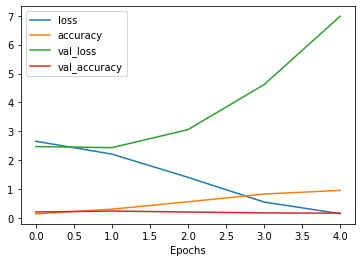

In [49]:
pd.DataFrame(history_mc_01.history).plot()
plt.xlabel("Epochs")
# plt.ylabel("")

Model: "FoodClassifierMultiClass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1_1 (Conv2D)     (None, 222, 222, 10)      280       
                                                                 
 conv_layer_1_2 (Conv2D)     (None, 220, 220, 10)      910       
                                                                 
 pooling_layer_1 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv_layer_2_1 (Conv2D)     (None, 108, 108, 10)      910       
                                                                 
 conv_layer_2_2 (Conv2D)     (None, 106, 106, 10)      910       
                                                                 
 pooling_layer_2 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                      

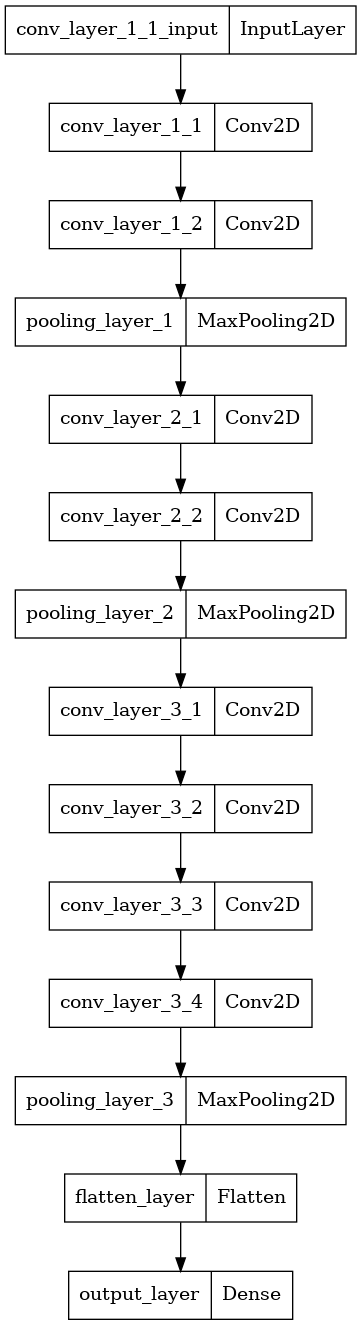

In [47]:
food_mc_mini_02 = tf.keras.Sequential(layers=[
    # First
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, input_shape=(224,224,3),
                           activation="relu", name="conv_layer_1_1"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation="relu", name="conv_layer_1_2"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid", name="pooling_layer_1"),
    # Second
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation="relu", name="conv_layer_2_1"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation="relu", name="conv_layer_2_2"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid", name="pooling_layer_2"),
    # Third
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation="relu", name="conv_layer_3_1"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation="relu", name="conv_layer_3_2"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation="relu", name="conv_layer_3_3"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation="relu", name="conv_layer_3_4"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid", name="pooling_layer_3"),
    tf.keras.layers.Flatten(name="flatten_layer"),
    tf.keras.layers.Dense(units=16, activation="softmax", name="output_layer"),    
], name="FoodClassifierMultiClass")

food_mc_mini_02.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=["accuracy"])
food_mc_mini_02.summary()
tf.keras.utils.plot_model(food_mc_mini_02)

In [48]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,)
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical", 
                                               )
history_mc_02 = food_mc_mini_02.fit(train_data_augmented,
                                    epochs=20,
                                    steps_per_epoch=len(train_data_augmented),
                                    validation_data=valid_data,
                                    validation_steps=len(valid_data),)


Found 12000 images belonging to 16 classes.
Epoch 1/5
375/375 [==============================] - 129s 343ms/step - loss: 2.7464 - accuracy: 0.0809 - val_loss: 2.6824 - val_accuracy: 0.1225
Epoch 2/5
375/375 [==============================] - 127s 340ms/step - loss: 2.6697 - accuracy: 0.1268 - val_loss: 2.5772 - val_accuracy: 0.1590
Epoch 3/5
375/375 [==============================] - 133s 354ms/step - loss: 2.6278 - accuracy: 0.1455 - val_loss: 2.5377 - val_accuracy: 0.1653
Epoch 4/5
375/375 [==============================] - 136s 363ms/step - loss: 2.5737 - accuracy: 0.1643 - val_loss: 2.5101 - val_accuracy: 0.1857
Epoch 5/5
375/375 [==============================] - 135s 361ms/step - loss: 2.5202 - accuracy: 0.1837 - val_loss: 2.4350 - val_accuracy: 0.2033


Text(0.5, 0, 'Epochs')

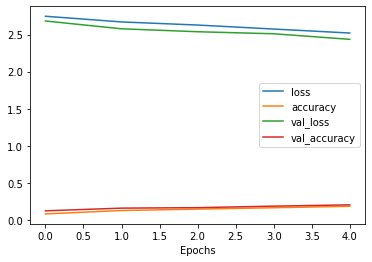

In [50]:
pd.DataFrame(history_mc_02.history).plot()
plt.xlabel("Epochs")
# plt.ylabel("")

In [53]:
food_mc_mini_03 = tf.keras.models.clone_model(food_mc_mini_02)
food_mc_mini_03.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=["accuracy"])
food_mc_mini_03.summary()
tf.keras.utils.plot_model(food_mc_mini_03)

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical", 
                                               )
history_mc_03 = food_mc_mini_03.fit(train_data_augmented,
                                    epochs=20,
                                    steps_per_epoch=len(train_data_augmented),
                                    validation_data=valid_data,
                                    validation_steps=len(valid_data),)


Model: "FoodClassifierMultiClass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1_1 (Conv2D)     (None, 222, 222, 10)      280       
                                                                 
 conv_layer_1_2 (Conv2D)     (None, 220, 220, 10)      910       
                                                                 
 pooling_layer_1 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv_layer_2_1 (Conv2D)     (None, 108, 108, 10)      910       
                                                                 
 conv_layer_2_2 (Conv2D)     (None, 106, 106, 10)      910       
                                                                 
 pooling_layer_2 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                      

KeyboardInterrupt: 

In [54]:
pd.DataFrame(food_mc_mini_03.history).plot()
plt.xlabel("Epochs")
# plt.ylabel("")

ValueError: DataFrame constructor not properly called!

In [55]:
food_mc_mini_03.save("models/multi_class_food_model.h5")

In [57]:
food_mc_mini_02.save("models/multi_class_food_model.h5")

### The best the multiclass model could do was around 16 percent (food_mc_mini_02)

## End of notes